# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# **Описание проекта:**

- Цель проекта: опредлеить параметры, которые наиболее влияют на стоимость объекта недвижимости в Санкт-Петербурге и области. 
- Данные для исследования получены из анкет людей, продающих недвижимость, а также на основе автоматической выгрузки данных о геолокации.
- План ислледования:

    1)Загрузка данных, проверка общей информации о датафрейме. 
    
    2)Предобработка данных: поиск и заполнение пропусков, обработка дубликатов, обработка аномальных значений. 
    
    3)Добавление новых параметров.
    
    4)Анализ параметров, влияющих на стоимость объекта недвижимости. 
    
    5)Общий вывод. 

### Откройте файл с данными и изучите общую информацию

Ипортируем необходимые библиотеки. Проверим общую информацию о датафрейме, просмотрим первые строки. Предварительно построим гистограммы чиловых параметров. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


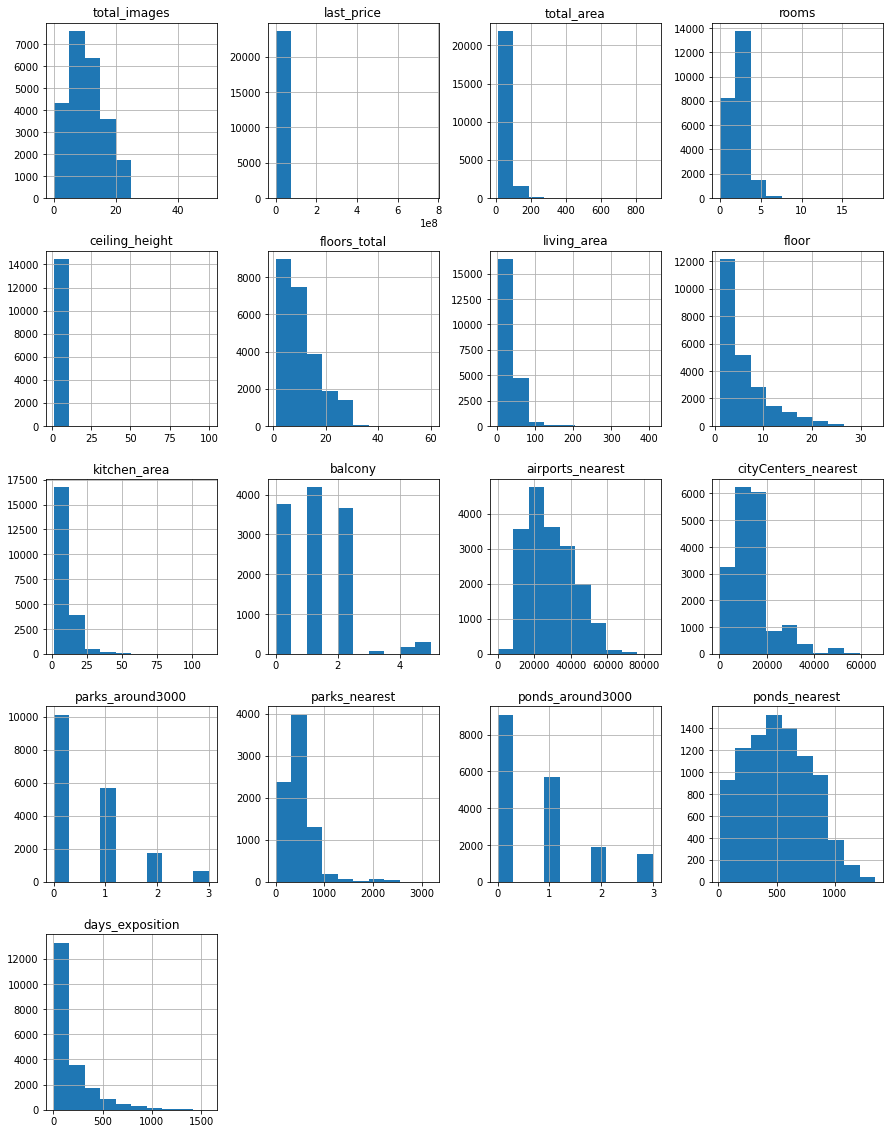

In [5]:
data.hist(figsize=(15, 20));

**Промежуточный вывод:** общая информация показала, что в данных имеются пропуски. 

- Необходимо заполнить пропущенные значения, где возможно.
- На графиках видно, что распределение числовых параметров во многих случаях не соответсвует нормальному распределению. В ходе исследования, построить более детальные графики, исследуемых параметров. 

### Выполните предобработку данных

#### Провека пропущенных значений:

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод:** В данных обнаружены пропущенные значения, обработаем данные и заполним пропуски, где это возможно. 

#### Переименуем некоторые столбцы для более удобной работы:

In [7]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3km', 'ponds_around3000':'ponds_around_3km'})

#### Обработка пропусков в параметрах:

##### Высота потолков  

Большинство зданий строится однотипно, со схожей высотой потолков. Исходя из стандартизации в строительстве найдем медианное значение и заполним им пропуски в параметре ceiling_height. 

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

##### Удаление данных:

В параметрах 'locality_name' и 'floors_total' немного пропущенных значений 49 и 86 из 23699.

Удалим данные строки:

    1)'locality_name' - пропуск в данном параметре не позволит утверждать, что данные относятся к объекту ислледования. Возможно это случайные, данные, которые заполнялись пользователями из других регионов. 
    2)'floors_total' - даже в рамках одного жилого комплекса здания могут быть разной высоты, что влияет на стоимость квартир в них. Другие параметры не позволят с достоверностью заполнить данные пробелы, а заполнение пропусков медианными или средними значениями по столбцу некорректно из-за выше описанной причины. Также в Санкт-Петербурге не так много высотных зданий, по этой причине мы также не можем утверждать, что пропуски в значениях относятся к исследумой зоне. В ходе исследования подробнее разберем данный параметр. 
    3)Пропусков в данных параметрах слишком мало, их удаление не повлияет на репрезентативность выборки. 


In [9]:
data = data.dropna(subset=['locality_name', 'floors_total'])

##### Заполнение нулевыми значениями

Пропуски в некоторых параметрах могут обозначать отсутсвие данного прааметра для продаваемого объекта, что позволяет заполнить их 0:

    1) 'parks_around_3km' и 'ponds_around_3km' - вероятнее всего обозначает отсутвие парков и водоемов поблизости. 
    2) 'balcony' -вероятно в продаваемой квартире отсутсвует балкон.
    3) 'kitchen_area' - вероятно в продаваемой квартире отсутвует кухня, например, квартиры студии или некоторые квартиры с европланировкой. 

In [10]:
def zero_summ(parametr):
    data[parametr] = data[parametr].fillna(0)
    return
    

In [11]:
zero_summ('parks_around_3km')
zero_summ('balcony')
zero_summ('ponds_around_3km')
zero_summ('kitchen_area')

##### Незаполненные пропуски

- Пропуски в параметрах  parks_nearest, ponds_nearest, city_centers_nearest, airports_nearest нельзя заполнять нулями, это будет озночать максимальную приближенность к центру, аэропорту, парку или водоему (в зависимости от параметра), что не соответсвует действительности. Эти 4 параметра вероятнее всего были выгружены автоматически из системы геолокации. Рекомендуется перепроверить выгрзку данных параметров. Чтобы не фальсифицировать данные о расстоянии, оставим данные категории с пропусками. 

- Параметр living_area не может быть заполнен нулями, как kitchen_area. Если заполнить его 0, это будет означать, что площадь не жилая. Также не будем удалять пропуски из-за-того,  в параматре total_area нет пропущенных значений, а он включает в себя жилую площадь. 

- Не будем заполнять пропуски и в параметре "сколько дней было размещено объявление (от публикации до снятия)" (days_exposition). Пропуски могут означать, что недвижимость ещё не продалась. 

**Вывод:** Пропуски в параметрах parks_nearest, ponds_nearest, city_centers_nearest, airports_nearest, living_area, days_exposition.

##### Пропуски логических значений

Параметр 'is_apartment' проверяет является ли продаваямая квартира апартаментами. В Санкт-Петербурге и Ленинградской области апартаменты не так сильно распространены. Вероятнее всего при заполнении пользователем  анкеты скорее всего пропуск обозначает, что  продаваемая недвижимость - не апартаменты.

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**Промежуточный вывод:**

Перепроверим количетсво пропусков. Ипредварительно скорректируем индексы датафрейма. 

In [13]:
data.isna().sum()
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23561,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,...,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23562,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,...,0.00,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23563,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


- Удалили пропуски по некоторым параметрам. 
- В некоторых параметрах пропуски остались, из-за того, что нельзя подставить логически верную альтернативу или есть параметры, которые 
- В ходе заполнения пропусков были некоторые допущения. 
- Данные нуждаются в перепроверке выгрузки и заполнения для более качетвенного исследования.  

#### Обработка дубликатов:

Проверим на явные дубликаты. 

In [14]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено. 

Проверим названия населенных пунктов на неявные дубликаты. 

In [15]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Из получившегося списка названий видно, что некоторые населенные пункты, например Большая Изжора упоминаются несколько раз, только с разным описанием. Уберем из названий описание населенных пунктов, оставив только названия. 

In [16]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['городской поселок ', 'деревня ', 'коттеджный поселок ', 'поселок ', 'городского типа ', 'село ',
    'при железнодорожной станции ', 'станции ', 'садоводческое некоммерческое товарищество ', 
    'садовое товарищество '], '', regex=True)
)

Проверим измененные названия:

In [17]:
sorted(data['locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Иссад',
 'Калитино',

Неявные дубликаты в названиях населенных пуктов удалены. 

#### Форматирование типов данных

Ещё раз проверим типы данных по каждому параметру: 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Преобразуем формат параматра "дата публикации" в формат даты:

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Количество парков, водоемов, балконов, этажей не может быть дробным, поэтому преобразуем тип данных в целочисленные значения. 

Также для удобства преобразуем тип данных в категории last_price. Недвижимость пости всегда продают за целочисленные суммы. 

Тип данных параметра is_apartment преобразуем в bool - логические показатели True/False.

In [20]:
data['ponds_around_3km'] = data['ponds_around_3km'].astype('int')
data['parks_around_3km'] = data['parks_around_3km'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')

Перепроверим изменение типа данных:

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

#### Обработка аномальных значений:


Проверим некоторые параметры на аномальные значения c помощбю функции: 

In [22]:
def anomaly(parametr):
    print(parametr.sort_values(ascending=False).head(30))
    print(parametr.sort_values(ascending=False).tail(30))
    print('Минимум: ', parametr.min(), 'Максимум: ', parametr.max())
    

##### Высота потолков(ceiling_height):

Изначально проверим высоту потолков. 

In [23]:
anomaly(data['ceiling_height'])

22869    100.0
3148      32.0
22336     32.0
21377     27.5
5807      27.0
5246      27.0
10773     27.0
17857     27.0
21824     27.0
20478     27.0
22938     27.0
4876      27.0
5669      26.0
11285     25.0
18545     25.0
6246      25.0
355       25.0
4643      25.0
9379      25.0
14382     25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
17442      8.0
3474       8.0
20264      6.0
Name: ceiling_height, dtype: float64
10160    2.40
5542     2.40
13271    2.40
20564    2.40
13462    2.40
15939    2.40
21349    2.40
1322     2.40
11125    2.40
227      2.34
23498    2.30
5498     2.30
17762    2.30
1582     2.30
17794    2.25
12755    2.20
5850     2.00
20520    2.00
4212     2.00
19098    2.00
22960    2.00
11352    2.00
16446    2.00
19329    2.00
16884    2.00
2572     2.00
552      2.00
16934    1.75
5712     1.20
22590    1.00
Name: ceiling_height, dtype: float64
Минимум:  1.0 Максимум:  100.0


Есть как аномально большие, так и аномально высокие значения. Скорее всего произошла опечатка при заполнении данных. И хотя другие данные могут быть "хорошими" исключим строки с аномальными значениями по данному показателю из выборки потому, что высота потолков один из ваных показателей, на которые люди обращают внимание. 

Ограничим выборку от 2х  до 5 метров. 

In [24]:
data = data.loc[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 5)]

##### Количество этажей ('floors_total'):

Проверим показатель этажности дома:

In [25]:
anomaly(data['floors_total'])

2253     60
16731    52
397      36
11079    36
9370     35
871      35
13975    35
20938    35
4855     35
9579     35
22946    35
9186     35
14347    35
5749     35
5808     35
18617    35
8496     35
18629    35
18218    35
1917     35
1060     35
21599    35
12960    35
7236     35
12888    35
2966     35
15982    35
21809    35
1697     34
11575    33
Name: floors_total, dtype: int64
16551    2
3366     2
19822    2
6684     2
3368     2
22855    1
8335     1
5698     1
22841    1
3076     1
11746    1
18900    1
17744    1
9517     1
5787     1
14836    1
23498    1
16444    1
10817    1
11641    1
5300     1
4379     1
21603    1
8388     1
22550    1
19590    1
7962     1
17020    1
9752     1
15543    1
Name: floors_total, dtype: int64
Минимум:  1 Максимум:  60


Санкт-Петербург не славится своими высотными зданиями. Одноэтажные этажные здания не вызывают подозрений,их можно встретить даже в центре города, однако 60 и 52 этажа слишком высоко, не говоря уже о пригородах. Данные либо попали по ошибке, либо были допущены ошибки при заполнении. 
Обычно для новостроек в Санкт-Петербурге 35 зданий - максимальная средняя величина. 

Ограничим данный параметр 40 этажами. 

In [26]:
data = data.loc[data['floors_total'] <= 40]

##### Этаж квартиры(floor):

Так как были обнаружены аномальные значения в количестве этажей дома, перепроверим параметр - этаж квартиры. 

In [27]:
anomaly(data['floor'])

18218    33
11575    32
18629    31
1917     30
11079    29
397      28
7711     27
16644    27
2629     27
6157     27
4091     27
8496     27
23292    27
13276    27
12888    27
113      27
7435     26
15053    26
14347    26
13524    26
5749     26
19142    26
6607     26
6971     26
9514     26
2026     26
15520    26
4724     26
4247     26
9799     26
Name: floor, dtype: int64
10326    1
20625    1
10327    1
10335    1
10515    1
20576    1
20577    1
10507    1
10506    1
20580    1
10500    1
10494    1
10481    1
10476    1
10462    1
10445    1
10442    1
10415    1
10401    1
10397    1
10380    1
10377    1
20607    1
10359    1
10358    1
20613    1
10341    1
10340    1
10338    1
23698    1
Name: floor, dtype: int64
Минимум:  1 Максимум:  33


**Вывод:** Аномалии в данном параметре не обнаружены. 

##### Жилая площадь(living_area):

In [28]:
anomaly(data['living_area'])

19540    409.7
5358     409.0
12401    347.5
4237     332.0
12859    322.3
660      312.5
8018     301.5
14088    300.0
20273    279.6
22494    274.0
14498    264.5
19865    260.0
15651    258.0
1085     255.7
12971    250.0
1494     250.0
15151    250.0
793      250.0
15701    250.0
6221     248.7
15607    248.5
20314    239.4
2580     230.0
16915    225.9
866      222.0
7857     220.0
21955    220.0
13749    218.0
6621     216.0
21685    211.0
Name: living_area, dtype: float64
23324   NaN
23326   NaN
23355   NaN
23380   NaN
23413   NaN
23423   NaN
23426   NaN
23452   NaN
23457   NaN
23466   NaN
23490   NaN
23500   NaN
23517   NaN
23530   NaN
23534   NaN
23544   NaN
23554   NaN
23584   NaN
23587   NaN
23588   NaN
23601   NaN
23602   NaN
23607   NaN
23613   NaN
23632   NaN
23642   NaN
23663   NaN
23670   NaN
23679   NaN
23697   NaN
Name: living_area, dtype: float64
Минимум:  2.0 Максимум:  409.7


**Вывод:** Аномалии в данном параметре не обнаружены. 

##### Площадь кухни (kitchen_area)

In [29]:
anomaly(data['kitchen_area'])

19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
16797     93.0
10867     87.2
4394      77.0
492       77.0
14644     75.0
16647     72.0
15651     70.0
6193      70.0
1085      66.0
22980     65.0
18447     65.0
15780     64.0
19499     64.0
17912     64.0
7543      63.4
19130     63.0
14900     62.5
13139     62.0
3117      60.0
13845     60.0
3561      60.0
8261      58.4
20871     58.0
4320      56.2
17038     56.0
Name: kitchen_area, dtype: float64
3874     0.0
3871     0.0
20554    0.0
14325    0.0
14388    0.0
3918     0.0
8838     0.0
20489    0.0
3968     0.0
3967     0.0
178      0.0
1153     0.0
20436    0.0
14459    0.0
14453    0.0
20446    0.0
3956     0.0
20450    0.0
20454    0.0
8806     0.0
3948     0.0
3943     0.0
8808     0.0
8809     0.0
20470    0.0
20471    0.0
14408    0.0
20482    0.0
20484    0.0
11391    0.0
Name: kitchen_area, dtype: float64
Минимум:  0.0 Максимум:  112.0


**Вывод:** Нижзние значения заполнены нулями, так как пропускизаполнялись нулями. Верзние значения в 100 и более квадратных метров для кухни кажутся подозрительными. Пока что оставим данные, и перепроверим их в ходе анализа. 

##### Общая площадь (total_area):

In [30]:
anomaly(data['total_area'])

19540    900.00
12859    631.20
3117     631.00
15651    618.00
5358     590.00
4237     517.00
8018     507.00
5893     500.00
15016    500.00
12401    495.00
9826     494.10
22494    491.00
6621     488.00
660      483.90
6221     470.30
20273    460.80
3676     441.98
21955    431.00
22131    422.20
14991    413.50
13749    410.00
14088    402.00
14706    401.00
12971    400.00
15151    400.00
5873     400.00
8822     398.00
5042     380.00
7674     380.00
14498    374.60
Name: total_area, dtype: float64
4077     20.00
19477    20.00
17860    20.00
5855     19.50
9817     19.00
8454     19.00
23191    18.90
8755     18.80
12881    18.50
8729     18.40
20714    18.00
12996    18.00
4542     18.00
19311    18.00
6084     18.00
21802    17.78
9157     17.60
22356    17.20
716      17.00
10208    17.00
9412     16.00
8886     15.50
16949    15.00
12040    15.00
19642    14.00
19558    13.20
19546    13.00
17961    13.00
19807    13.00
19904    12.00
Name: total_area, dtype: float64
Мини

**Вывод:** Хотя показатель 900 кв.м кажется подозрительным, но это может быть продажа дома в пригороде или многоэтажной квартиры, оставим данный параметр без имзенений и перепроверим его в ходе исследования. 

##### Проверка даты публикации(first_day_exposition):

Проверим возможные аномалии в датах публикации объёявлений. Вероятно, что публикации не относятся к исследуемому периоду или были сделаны до создания сервиса Яндекс.Недвижимость. 

In [31]:
anomaly(data['first_day_exposition'])

3254    2019-05-03
5986    2019-05-03
12208   2019-05-03
13993   2019-05-03
12343   2019-05-03
2178    2019-05-03
8170    2019-05-03
15881   2019-05-03
15072   2019-05-03
17872   2019-05-03
4450    2019-05-03
12003   2019-05-03
13746   2019-05-03
12380   2019-05-03
14424   2019-05-03
9217    2019-05-03
17551   2019-05-03
10917   2019-05-03
14246   2019-05-03
21887   2019-05-03
1468    2019-05-02
10684   2019-05-02
13026   2019-05-02
18743   2019-05-02
13118   2019-05-02
5271    2019-05-02
6103    2019-05-02
1958    2019-05-02
13913   2019-05-02
10717   2019-05-02
Name: first_day_exposition, dtype: datetime64[ns]
6922    2014-12-08
5223    2014-12-08
21429   2014-12-08
7545    2014-12-08
5775    2014-12-08
12860   2014-12-08
21039   2014-12-08
2063    2014-12-05
12875   2014-12-04
15550   2014-12-04
19352   2014-11-29
3291    2014-11-27
2831    2014-11-27
6726    2014-11-27
617     2014-11-27
696     2014-11-27
4812    2014-11-27
10132   2014-11-27
15857   2014-11-27
10364   2014-11-27


**Вывод:** Аномальные значения не обнаружены.

##### Проверка цены (last_price):

In [32]:
anomaly(data['last_price'])

12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
19865    180000000
19155    160000000
2536     159984000
16495    159000000
15016    150000000
7857     150000000
22229    148000000
12859    140000000
12674    140000000
3117     140000000
17912    135000000
793      135000000
7674     131000000
2243     130278280
7543     130000000
21955    130000000
13864    130000000
1928     125000000
20349    124480000
21023    124350000
Name: last_price, dtype: int64
13809    565000
22997    560000
8630     560000
19460    560000
1358     550000
7962     550000
1053     550000
7376     550000
11351    550000
13768    550000
12607    530000
22430    520000
2097     500000
4405     500000
14295    500000
14904    500000
10782    490000
6859     490000
16032    480000
21912    470000
23484    470000
18867    470000
16219    450000
9581     450000
5698     450000

12190 рублей - слишком маленькая цена для продажи недвижимости. Вероятнее всего в данных ошибка. Уберем данный пункт из выборки. 

Значения 763 и 420 млн очень похожи на аутлаеры, относящиеся к продаже элитной недвижимости. Данные случаи скорее единичны и элитная недвижимость не продается систематически.

Отбросим значения с ценой выше 100 млн рублей,

In [33]:
data = data.loc[(data['last_price'] >= 430000) & (data['last_price'] <= 200000000)]

Также значения в данном параметре разделим на 1 млн, чтобы было удобнее обрабатывать большие числа. Далее значения в данном параметре будут указна в миллионах. Пример 13 в значении параметра будет означать 13 миллионов рублей. 

In [34]:
data['last_price'] = data['last_price'] / 1000000

#### Общий вывод предобработки данных:

Перепроверим пропуски и общую информацию о таблице, также ещё раз обновим индексы:

In [35]:
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3.350,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,11.00,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5.196,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64.900,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,0.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10.000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23509,9,9.700,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23510,14,3.100,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23511,18,2.500,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0.00,0,Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23512,13,11.475,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


In [36]:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1862
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5513
city_centers_nearest     5490
parks_around_3km            0
parks_nearest           15508
ponds_around_3km            0
ponds_nearest           14505
days_exposition          3162
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23514 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23514 non-null  int64         
 1   last_price            23514 non-null  float64       
 2   total_area            23514 non-null  float64       
 3   first_day_exposition  23514 non-null  datetime64[ns]
 4   rooms                 23514 non-null  int64         
 5   ceiling_height        23514 non-null  float64       
 6   floors_total          23514 non-null  int64         
 7   living_area           21652 non-null  float64       
 8   floor                 23514 non-null  int64         
 9   is_apartment          23514 non-null  bool          
 10  studio                23514 non-null  bool          
 11  open_plan             23514 non-null  bool          
 12  kitchen_area          23514 non-null  float64       
 13  balcony         

- В ходе преобработки данных были обнаружены пропуски. Наиболее вероятными причинами могли стать человеческие ошибки (при заполнении данных владельцами квартир) и програмные ошибки (при автоматической выгрузке геолокационных данных). 
- Пропуски в данных были заполнены, где возможно. 
- Удалены дубликаты в названиях населенных пунктов. 
- Изменен тип данных некоторых столбцов. 
- Обработаны и удалены наиболее заметные аномальные значения. 




### Добавьте в таблицу новые столбцы

Добавим новые параметры: 

1) Цена за квадратный метр. Поделим последнюю указанную цену на общую площадь. 

In [38]:
data['sqr_m_price'] =  data['last_price'] / data['total_area'] * 1000000

2) День публикации объявления:

In [39]:
data['day_posting'] = data['first_day_exposition'].dt.weekday 

3) Месяц публикации объявления:

In [40]:
data['month_posting'] = data['first_day_exposition'].dt.month 

4) Год публикации объявления:

In [41]:
data['year_posting'] = data['first_day_exposition'].dt.year 

5) Для этажей, на которых находятся квартиры, определим категории: «первый», «последний», «другой». В зависимости от значений в параметре floor.

In [42]:
def categorize_floor(floor_category):
    try:
        if floor_category['floor'] == 1:
            return 'первый'
        if floor_category['floor'] == floor_category['floors_total']:
            return 'последний'
        else:
            return 'другой'
       
    except:
        pass




In [43]:
data['floor_category'] = data.apply(categorize_floor, axis = 1)

6) Расстояние от центра города в км. Разделим расстояние, указанное в параметре city_centers_nearest в метрах, на 1000.

In [44]:
data['city_centers_km'] = (data['city_centers_nearest']/1000).round()

Проверим обновленный датафрейм: 

In [45]:
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,sqr_m_price,day_posting,month_posting,year_posting,floor_category,city_centers_km
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3.350,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5.196,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64.900,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10.000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2.890,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,NaN
6,6,3.700,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,NaN,0,NaN,155.0,99195.710456,3,11,2017,другой,19.0
7,5,7.915,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
8,20,2.900,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,0,NaN,189.0,87454.764777,2,5,2018,другой,NaN
9,18,5.400,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,0,NaN,289.0,88524.590164,6,2,2017,другой,15.0


In [46]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1862
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5513
city_centers_nearest     5490
parks_around_3km            0
parks_nearest           15508
ponds_around_3km            0
ponds_nearest           14505
days_exposition          3162
sqr_m_price                 0
day_posting                 0
month_posting               0
year_posting                0
floor_category              0
city_centers_km          5490
dtype: int64

**Вывод:** Новые параметры добавлены в датафрейм.

### Проведите исследовательский анализ данных

#### Исследовательский анализ параметров:

Функция для исследовательского анализа (описание параметра и boxplot). На основе диаграмм размаха ограничим выборку и построим гистограммы, где требуется. 

In [47]:
def analysis(parametr):
    try:
        display(data[parametr].describe())
        data.pivot_table(index=['locality_name'], values = parametr).boxplot()
        plt.show()
    except:
        data[parametr].hist()
    
    

##### Анализ общей площади (total_area):

count    23514.000000
mean        60.147791
std         34.537681
min         12.000000
25%         40.000000
50%         52.000000
75%         69.607500
max        631.200000
Name: total_area, dtype: float64

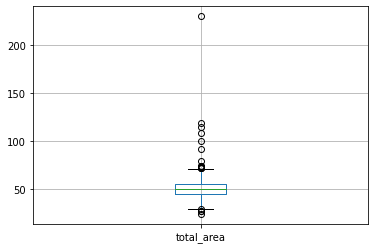

In [48]:
analysis('total_area')

<AxesSubplot:>

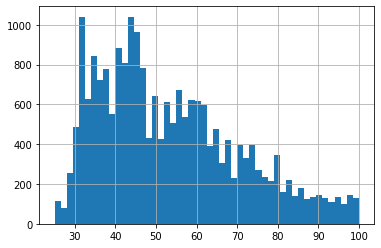

In [49]:
data['total_area'].hist(bins=50, range=(25,100))

***Вывод:*** Из графиков и описания параметра видно, что в основном выставлялись дома на продажу от 32 до 47 м2.
Затем можем наблюдать небольшой пик около 55-61 кв.м. После количество объявлений о продаже идет на спад. 

##### Жилая площадь (living_area):

count    21652.000000
mean        34.374590
std         21.658985
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.000000
Name: living_area, dtype: float64

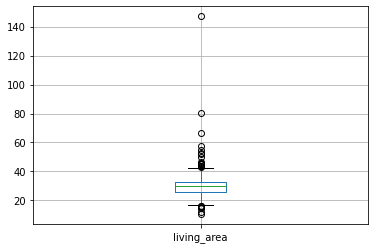

In [50]:
analysis('living_area')

<AxesSubplot:>

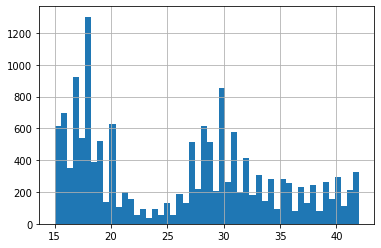

In [51]:
data['living_area'].hist(bins=50, range=(15,42))

***Вывод:*** На гистограмме можно заметить 2 пика 18 м2(ориентировочно Q1) и 30 м2 (медиана). Между пикапи можем наблюдать большой спад предложениях. Это может быть обусловлено пропусками в данном параметре, которые в теории могли бы заполнить данную "пропасть" значений. 

##### Площадь кухни (kitchen_area):

count    23514.000000
mean         9.551538
std          6.336532
min          0.000000
25%          6.300000
50%          9.000000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

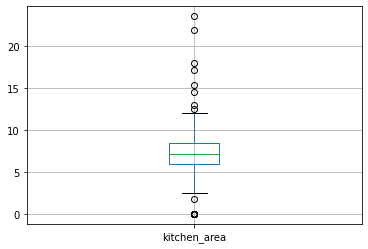

In [52]:
analysis('kitchen_area')

<AxesSubplot:>

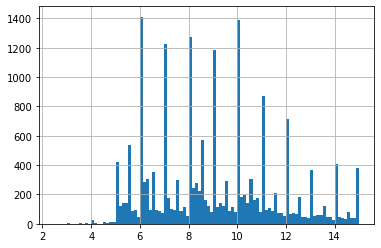

In [53]:
data['kitchen_area'].hist(bins=100, range=(2.5, 15))

***Вывод:*** На гистограмме видно, что пики приходятся на целые значения площади кухни. 
Наибольшее число объявлений, где площадь кухни 6 метров квадратных. 

##### Цена (last_price):

count    23514.000000
mean         6.391389
std          7.801946
min          0.430000
25%          3.400000
50%          4.642000
75%          6.778750
max        190.870000
Name: last_price, dtype: float64

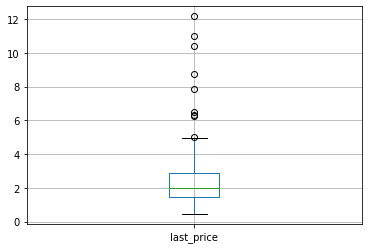

In [54]:
analysis('last_price')

<AxesSubplot:>

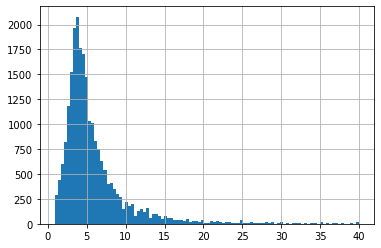

In [55]:
data['last_price'].hist(bins=100, range=(0.9 , 40))

***Вывод:*** графики показывают, что большинство квартир выставляется на продажу менее чем за 5 миллионов рублей. Пиковое значение стоимости продажи ориентировчно 3.5 - 4 млн.рублей. 

##### Высота потолков (ceiling_height):

count    23514.000000
mean         2.695975
std          0.215746
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

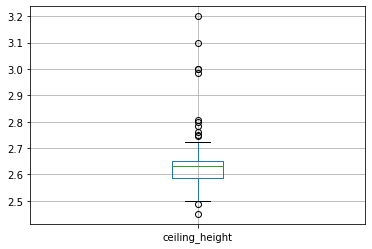

In [56]:
analysis('ceiling_height')

<AxesSubplot:>

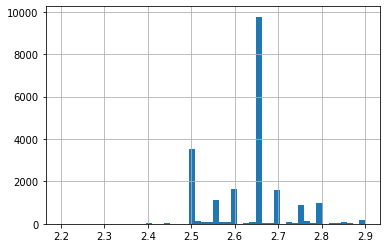

In [57]:
data['ceiling_height'].hist(bins=50, range=(2.2 , 2.9))

***Вывод:*** на гистограмме высоты потолков виден пик 2.65 м. Необходимо отметить, что данное значение может быть не до конца корректным. Также виден пик 2.5 м. 

##### Количество комнат (rooms):

count    23514.000000
mean         2.069108
std          1.074416
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

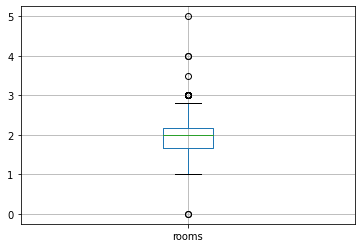

In [58]:
analysis('rooms')

<AxesSubplot:>

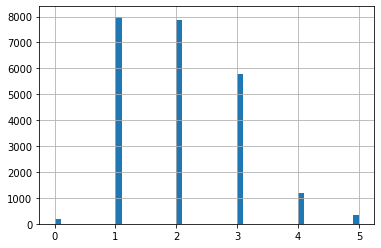

In [59]:
data['rooms'].hist(bins=50, range=(0, 5))

***Вывод:*** из описания параметров и графиков видно, что чаще всего выставляются на продажу 1-,2х-комнатные квартиры, чуть реже трехкомнатные квартиры. 

##### Категория этажа (floor_category):

count      23514
unique         3
top       другой
freq       17295
Name: floor_category, dtype: object

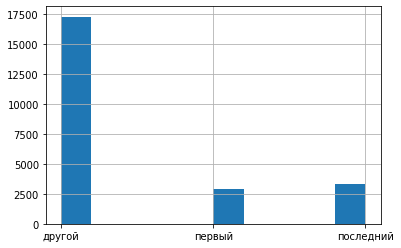

In [60]:
analysis('floor_category')

***Вывод:*** чаще всего продаются выставляются на продажу квартиры не на первом, и на последнем этаже, а в "середине" дома. 

##### Количество этажей в доме (floors_total):

count    23514.000000
mean        10.673726
std          6.577927
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

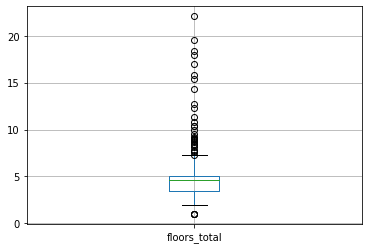

In [61]:
analysis('floors_total')

<AxesSubplot:>

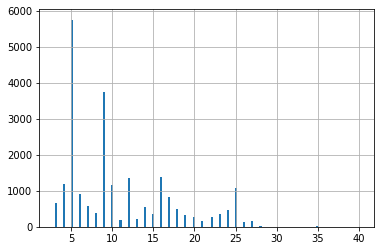

In [62]:
data['floors_total'].hist(bins=150, range=(3, 40))

***Вывод:*** чаще всего квартиры продавались в 5ти-, 9ти-этажных домах. Это может свидетельствовать о том, что дома советской постройке. В СССР были распространены дома с такой этажностью.

##### расстояние до центра города в метрах (city_centers_nearest):

count    18024.000000
mean     14199.231136
std       8607.419357
min        181.000000
25%       9252.000000
50%      13106.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

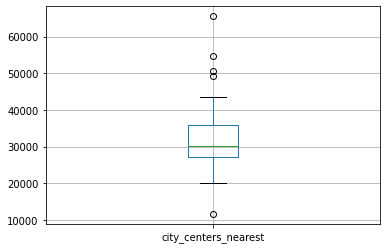

In [63]:
analysis('city_centers_nearest')

<AxesSubplot:>

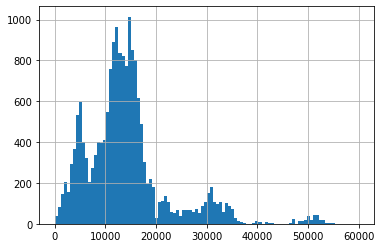

In [64]:
data['city_centers_nearest'].hist(bins=100, range=(0, 60000))

***Вывод:*** чаще всего продавались дома в 10-16 км от центра города. Также можем наблюдать пик на расстоянии 5 км от центра. Также можно увидеть небольшой пик около 30-33км, что может свидетельствовать о том, что недвижимость продавалась в пригородах. 

##### Расстояние до ближайшего парка.(parks_nearest ):

count    8006.000000
mean      490.629403
std       341.909715
min         1.000000
25%       287.250000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

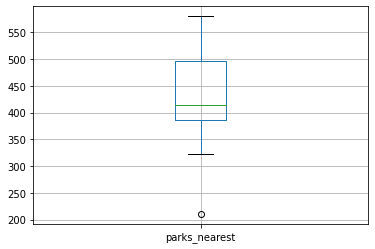

In [65]:
analysis('parks_nearest')

<AxesSubplot:>

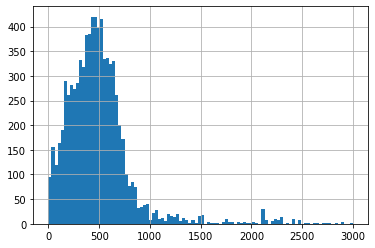

In [66]:
data['parks_nearest'].hist(bins=100, range=(0, 3000))

***Вывод:*** чаще всего продавались квартиры в домах, которые в 450-500м от парковой зоны. 

**Промежуточный вывод 4.1.1-4.1.10:** Обощая особенности выделенные в описании параметров ранее, можно предположить, что чаще всего на продажу выставлялись квартиры в домах построенных с 1956 по 1970е годы("хрущёвки"). 

Признаки:

- Большое количество продаваемых 5ти-,9ти-этажных, распространенныХ для того периода построки новых домов. 
- Общая площадь 30 -40 кв.м
- В квартире чаще всего 1 или 2 комнаты.
- Большинство продаваемых квартир стоит до 5 миллионов рублей. 
- Большинство продаваемых квартир удаленных от центра города на 10-15 километров и около парковых зон, свидетельствует о том, что дома строились преимущественно окраине города, в 1950е-1970е годы по ГОСТу парковая зона должна была быть в пешей доступности для большинства новостроек. 
- Высота потолков полученная в исследовании для большинства объектов недвижимости попадат в диапазон потолков "хрущевок": 2.4-2.7м

***Ремарка:*** график boxplot() подходит не для всех данных. Обычно в исследовании выбирается график, который наиболее подходит для определенных данных. Чтобы написать универсальную функцию, которая бы корректно отображала график boxplot для всех параметров и при этом не портила другие данные, не хватило знаний. Функция все равно использовалась в исследовании, чтобы сохранить единообразие. 

#### Скорость продажи квартир (days_exposition):

count    20352.000000
mean       180.754324
std        219.807117
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

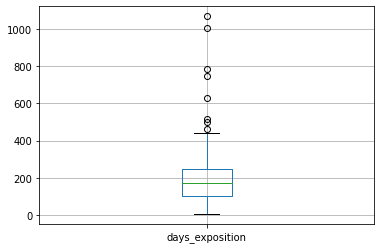

In [67]:
analysis('days_exposition')

<AxesSubplot:>

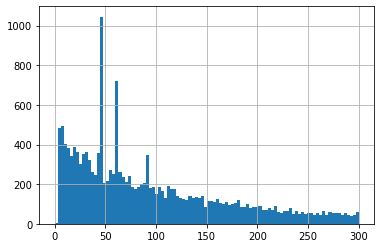

In [68]:
data['days_exposition'].hist(bins=100, range=(0,300)) 

**Вывод по скорости продажи квартир(сколько дней провисело объявление):**

- Минимальное значение: 1 день
- Среднее значение: 180 дней. 
- Медиана: 95 дней
- Q1: 45 дней
- Q3: 231 день. 

    1) Медиана(95 дней) больше подходит для описания средней длительности продажи квартиры, так как на среднее значение сильно зависит от выбросов и в данном параметре не является репрезентативным. 
    
    2) Быстрыми продажами можно считать те, которые были совершены быстре 45 дней - Q1.
    
    3) Медленными продажами можно считать те, которые были совершены быстре 231 дня - Q3.
    
    4) На графике можно увидеть несколько пиков 49 дней - чаще всего, ориентировочно 60 и 90. Следовательно можем утверждать, что продажа в средне занимает 1.5 - 3 месяца.  





#### Факторы, влияющие на стоимость объекта:

Проверим, какие факторы наиболее влияют на стоимость объекта недвижимости:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - количество комнат;
  - тип этажа, на котором расположена квартира (первый, последний, другой);
  - дата размещения (день недели, месяц, год).

##### Фильтрация выбросов:

В пункте 2.6 была проведена предварительная обработтка слишком аномальных значений, однако были отсечены только слишком выдающиеся значения. Основываясь на резуьтатах и гистограммах, полученных в пункте 4.1 проведем повторную фильтрацию данных по некоторым параметрам. 

In [69]:
good_data = data.query('10 <= total_area <= 200')
good_data = good_data.query('rooms <= 10')
good_data = good_data.query('floors_total <= 30')

##### Анализ по сводной таблице:

Построим сводную таблицу на основе выбранных данных, найдем коэффициэнты кореляции между параметрами. 

Параметры день, месяц, год публикации, хоть и меют числовое обозначение в датафрейме, скорее относятся к категориальным переменным, как и параметр категория этажа. Для данных параметров построим отдельные графики, чтобы посмотреть, как медианная цена менялась в зависимости от времени публикации. 

In [70]:
good_data.pivot_table(
    index='locality_name', values=['total_area', 
    'living_area', 'kitchen_area', 'rooms', 
    'floor_category', 'last_price']).corr()



,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.000000,0.352583,0.113555,0.081941,0.380009
last_price,0.352583,1.000000,0.465699,0.149816,0.548497
living_area,0.113555,0.465699,1.000000,0.709847,0.828198
rooms,0.081941,0.149816,0.709847,1.000000,0.734618
total_area,0.380009,0.548497,0.828198,0.734618,1.000000


- Цена больше всего коррелирует с показателем общая жилая площадь - коэф корееляции = 0.54. 
- Также цена слабее корреллирует с показателями площади кухни (kitchen_area) и площадь жилого пространства (living_area), которые являются составными частями total_area.
- Слабая прямая зависимость прослеживается и от зависимости количества комнат. 
- Также слабую обратную зависимость цены можно заметить года публикации объявления. Коэффициэт корреляции почти 0.15

Ниже построим матрицы диаграмм рассеяния:

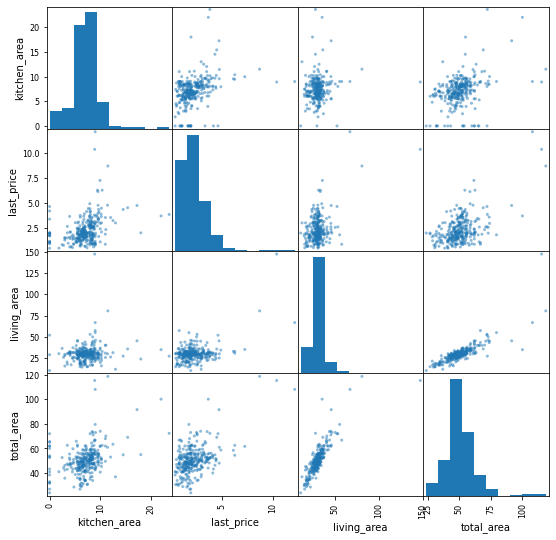

In [71]:
pd.plotting.scatter_matrix(good_data.pivot_table(index='locality_name', values=['total_area', 
    'living_area', 'kitchen_area', 'last_price']), figsize=(9,9)
);

На матрицах, можем наблюдать, что выводы, сделанные после проверки корреляции подтверждаются. 

Построим более детальные гистограммы для каждого из параметров, для поиска других особенностей. 

##### Описание параметров:

Функция для описания параметров:

In [72]:
def graf_param(parametr):
    if (parametr == 'day_posting') or (parametr == 'month_posting') or (parametr == 'year_posting') or (parametr == 'floor_category'):
        good_data.groupby(parametr)['last_price'].median().plot(x=parametr, y='last_price', 
            grid=True, figsize=(9, 9))
    else:
        good_data.pivot_table(index='locality_name', values=['last_price',
            parametr]).plot(x=parametr, y='last_price', style='o', grid=True, figsize=(10, 10))
    return

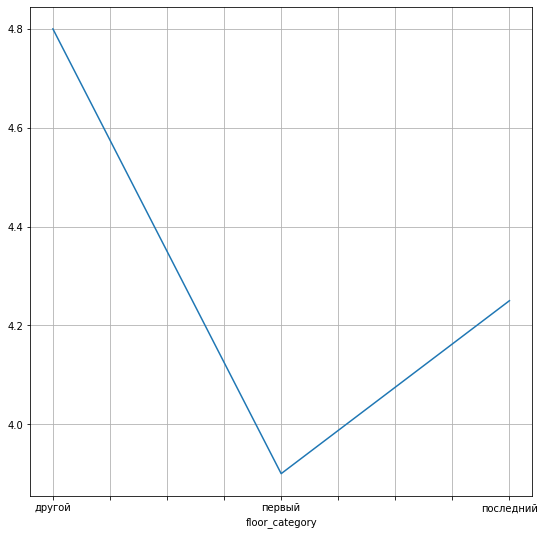

In [73]:
graf_param('floor_category')

***Вывод:*** Как видим на графике в среднем квартиры на первом этаже дешевле всего, квартиры на последнем этаже подороже, но самые дорогие - в "середине" дома. Это может быть обусловлено тем, что квартиры на первом этаже близки к улице, и их менее хотно покупают из-за более вероятного вороства, например. На последнем этаже более низкая цены может быть связана с тем, что если у дома начинаются проблемы с кровлей, первыми страдают самые верние этажи. Как следствие цены на эти квартиры ниже.

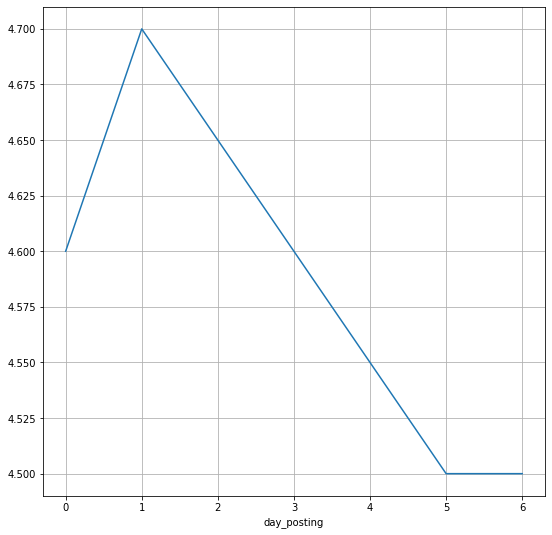

In [74]:
graf_param('day_posting')

***Вывод:*** На графике видно, что в среднем самые высокие цены у объявлений, опубликованных во вторник. Дешевле всего квартиры, выставленные на продажу в субботу или выходные. 

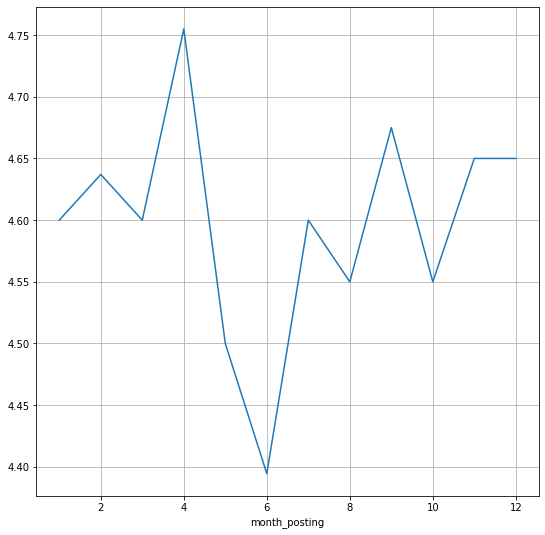

In [75]:
graf_param('month_posting')

***Вывод:*** График показывает, что самые дорогие объявления на продажу выставлялись в апреле и сентябре. Можно заметить, что в период с мая по июль на продажу выставлялись наиболее дешевые квартиры. 

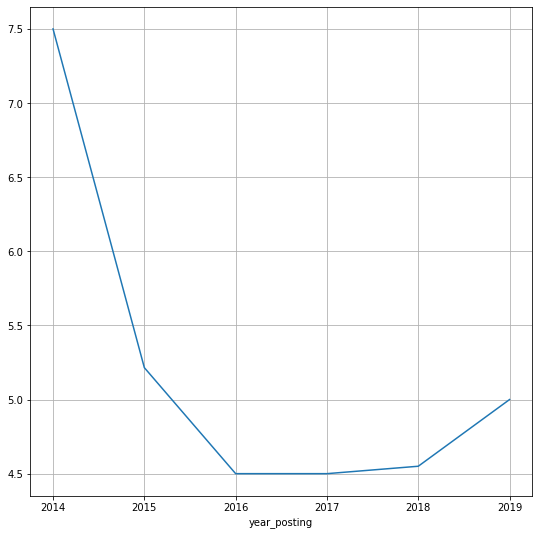

In [76]:
graf_param('year_posting')

***Вывод:*** График показывает, что дороже всего квартиры продавались в 2014 году, затем наблюдается резкий спад и с 2016 по 2017 года цены на продажу недвижимости были минимальными. С 2017 года можем наблюдать медленный рост цен в новых публикациях на продажу. 

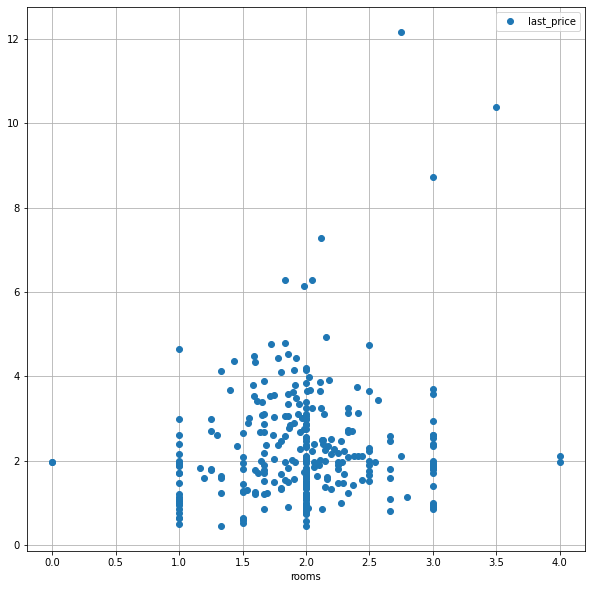

In [77]:
graf_param('rooms')

***Вывод:*** на графике можнно заметить слабую зависимость цены квартиры от числа комнат.

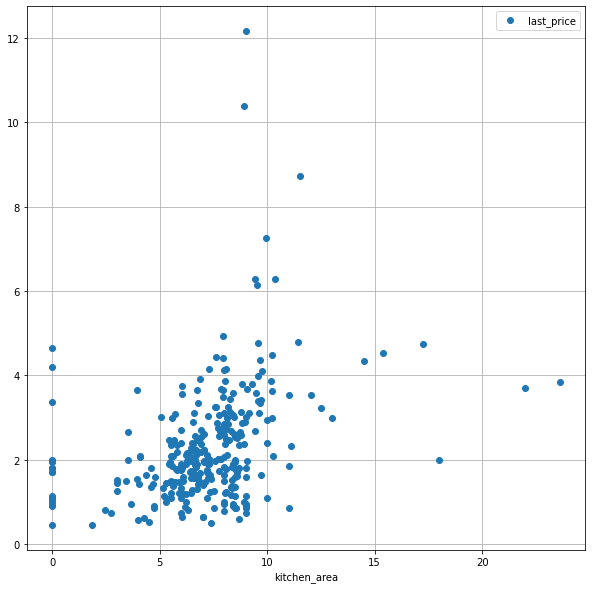

In [78]:
graf_param('kitchen_area')

***Вывод:*** на графике можнно заметить зависимость цены от площади кухни.

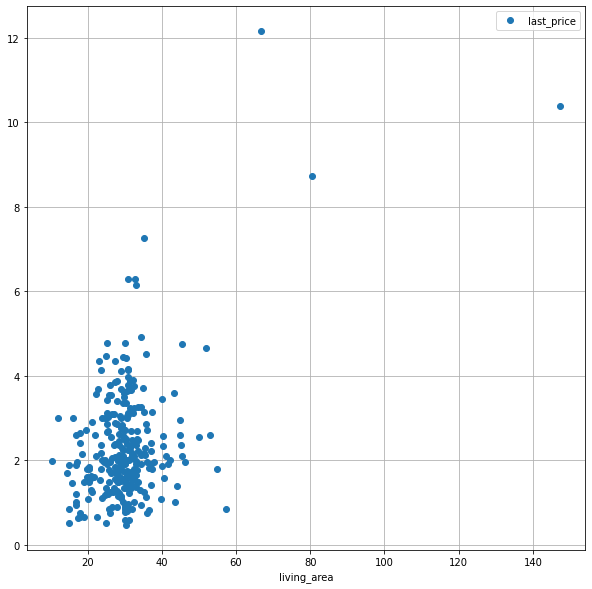

In [79]:
graf_param('living_area')

***Вывод:*** на графике прослеживается средняя зависимость цены от жилой площади. 

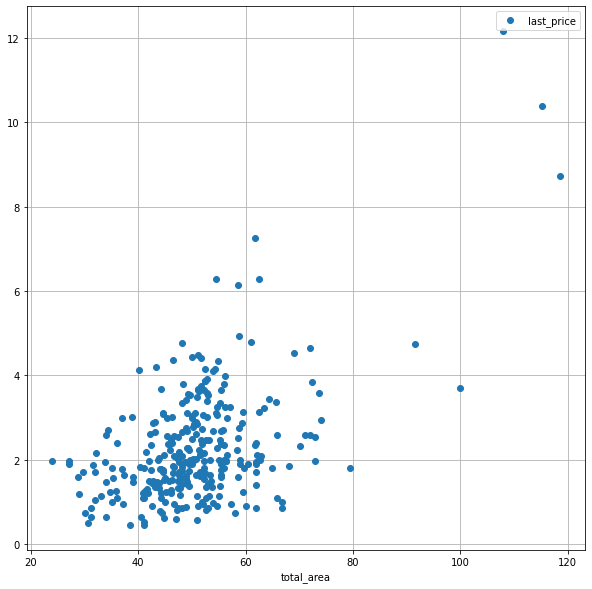

In [80]:
graf_param('total_area')

***Вывод:*** график показывает зависимость цены от общей площади жилья.

**Промежуточный вывод 4.3:**

Исследование зависимости цены от других параметров показало:

- Цена больше всего зависит от параметров связанных с общей площадью квартиры. Наибольшую корреляции цены с параметров total_area. Поэтому параметры площадей кухни и жилой зоны коррелируют, так как они являются составляющими total_area. Параметр количество комнат также можно отнести сюда, обычно чем больше площадь квартиры, тем больше комнат.  
- Самые дорогие квартиры чаще всего выставлялись на продажу во вторник. В субботу и воскресенье выставляются самы дешевые. 
- Самые дорогие квартиры вставляли на продажу в апреле. В летний период чаще публиковали объёвления о продаже более дешевых квартир. Начиная с сентября вновь публиковались объявления о более дорогих квартирах. 
- Самые дорогие квартиры продавались в 2014 году, затем наблюдается резкий спад и с 2016 по 2017 года цены на продажу недвижимости были минимальными. С 2017 года можем наблюдать медленный рост цен в новых публикациях на продажу.
- Квартиры на первых и последних этажах продаются по ценам ниже, чем в середине дома. 

####  Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [81]:
top_stat = good_data['locality_name'].value_counts()
display(top_stat.head(10))

Санкт-Петербург    15382
Мурино               584
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               364
Колпино              337
Парголово            326
Гатчина              306
Выборг               237
Name: locality_name, dtype: int64

In [82]:
top_stat = good_data.query('locality_name == ["Санкт-Петербург", "Мурино", "Кудрово", "Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг"]')

In [83]:
display(top_stat.pivot_table(index='locality_name', values='sqr_m_price').sort_values('sqr_m_price', ascending=False))

,sqr_m_price
locality_name,
Санкт-Петербург,113317.331706
Пушкин,103122.538840
Кудрово,95260.846171
Парголово,90332.263023
Мурино,86018.110911
Шушары,78551.344545
Колпино,75333.295801
Гатчина,68757.678644
Всеволожск,68654.473986


***Промежуточный вывод:*** Среди населнных пунктов с наибольшим количеством объявлений, самая большая цена за кв.метр в Санкт-Петербурге - 113317.33 рублей, самая низкая в Выборге - 58141.90 рублей за метр квадратный. 

#### Стоимость квартир в Санкт-Петербурге в зависимости от удаленности от центра города:

Изучим данные об удаленности продаваемых квартир о центра в Санкт-Петербурге.

In [84]:
spb_stat = good_data.query('locality_name == "Санкт-Петербург"')
spb_stat['city_centers_km'].describe()

count    15324.000000
mean        11.650744
std          4.805754
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_km, dtype: float64

Максимальное значение -29 км. Протяженность Санкт-Петербурга по наибольше оси с севера на юг - 44 км. Следовательно максимальный радиус от центра города - 22 км. 
Ограничим выборку данным значением 

<AxesSubplot:xlabel='city_centers_km'>

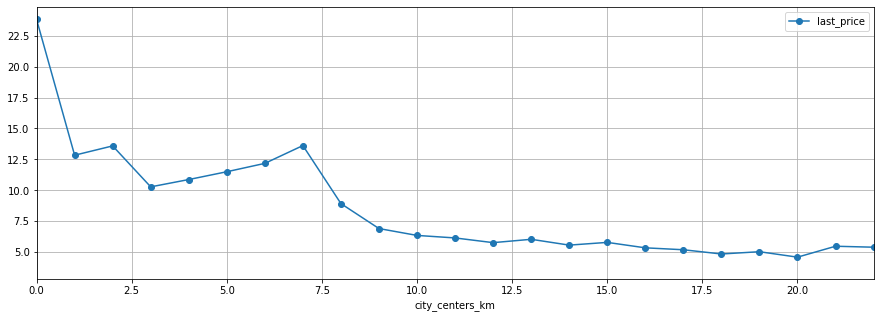

In [85]:
spb_stat.pivot_table(
    index='city_centers_km', values='last_price', aggfunc='mean').plot(xlim=(0, 22), 
    style='o-', grid=True, figsize=(15, 5)
)

График показывает, что самые дорогие квартиры находятся в центре города. Также  в районе 6-7 км от центра квартиры дорожают. Затем снова идет на спад. 

Выведем на экран таблицу средних значений: 

In [86]:
display(spb_stat.query(
    'city_centers_km <= 22').pivot_table(
    index='city_centers_km', values='last_price', aggfunc='mean')
)

,last_price
city_centers_km,
0.0,23.805045
1.0,12.843250
2.0,13.594593
3.0,10.287909
4.0,10.878650
5.0,11.508767
6.0,12.184551
7.0,13.622231
8.0,8.935228


***Промежуточный вывод:*** как и показал график, самые дорогие средние цены на квартиры в центре в Санкт-Петербурга, стоящие в среднем 23.8 млн рублей. Следующий пик на графике на расстоянии 7 км, затем цены постепенно снижаются по мере удаления от центра города.

### Напишите общий вывод

# **Общий вывод исследования:**

#### Ошибки в данных. 

- Предоставленные для исследования данные имеют много пропусков и незаполненных значений.
- Большое количество пропусковы было среди геоданных, которые выгружались автоматически. Необходимо проверить алгоритм автоматической выгрузки данных, высока вероятность ошибок.
- Данные предоставленные пользователями, также имеют большое количество пропусков. Рекомендуется скорректировать анкету, чтобы было меньше разночтений, особенно в параметрах, относящихся к площадь помещений. 
- Большинство пропусков, связанных с  геолокацией, могло быть заполнено корректно, если бы была предоставлена информация об адресе, продаваемой квартиры.
- По возможности рекомендуется запрашивать чертеж планировки. Это позволит точнее заполнять параметры, заполняемые пользователем в случаях ошибок или пропущенных значений. 
- В ходе исследования некоторых пропущенные значения были заполнены самостоятельно, что могло немного исказить результаты исследования некоторых параметров.

**Рекомендуется повторный анализ данных после устранения технических проблем с выгрузкой данных.**

#### Результаты исследования: 

- В ходе исследования удалось выяснить, что чаще всего продаются квартиры в домах, построенных в СССР в 1950-1970е года средняя цена 4-5 миллионов рублей(пункт 4.1). 

- Среднее время продажи квартир 1.5 - 3 месяца.
- Наболее значимым фактором для формирования стоимости квартиры является общая площадь, продаваемой недвижимости.
- В населенных пунктах с наибольшим количеством обявлений наибольшаяя цена за квадратный метр в Санкт-Петербурге - 113317.33 рублей, самая низкая в Выборге - 58141.90 рублей за метр квадратный.
- Самые дорогие квартиры в Санкт-Петербруге - в самом центре города, средняя стоимость 23 млн рублей. Затем в радиусе 7 км от центра города, средняя цена продаваемых квартир в исследуемы период от 10 до 13 млн рублей. Дальше 8 км от центра города цены падают постепенно снижаясь до 4.8 - 5.2 млн рублей. 
- Самые дорогие квартиры чаще всего выставлялись на продажу во вторник. В субботу и воскресенье выставляются самы дешевые. 
- Самые дорогие квартиры вставляли на продажу в апреле. В летний период чаще публиковали объёвления о продаже более дешевых квартир. Начиная с сентября вновь публиковались объявления о более дорогих квартирах. 
- Самые дорогие квартиры продавались в 2014 году, затем наблюдается резкий спад и с 2016 по 2017 года цены на продажу недвижимости были минимальными. С 2017 года можем наблюдать медленный рост цен в новых публикациях на продажу.
- Квартиры на первых и последних этажах продаются по ценам ниже, чем в середине дома.

